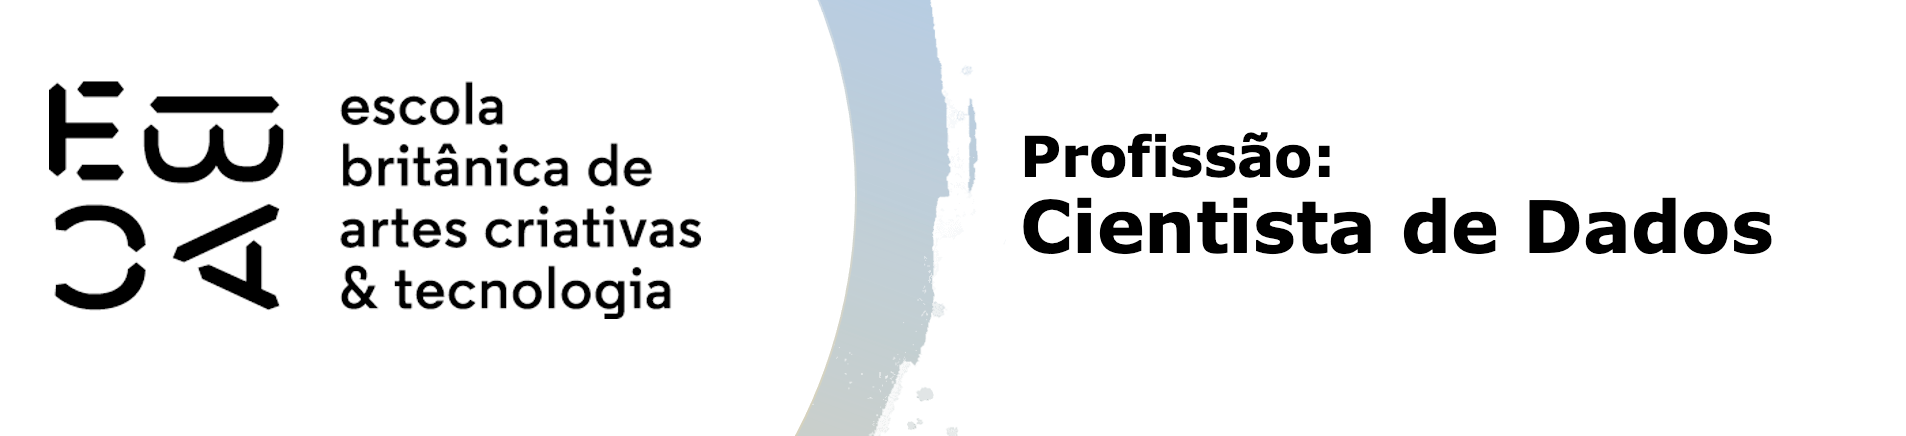

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [2]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [3]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0         16.717808
1          9.600000
2          8.208219
3          1.301370
4          1.254795
            ...    
749995     8.665753
749996     7.746165
749997    10.969863
749998     8.219178
749999     7.746165
Name: tempo_emprego, Length: 750000, dtype: float64

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

<AxesSubplot:xlabel='renda', ylabel='renda'>

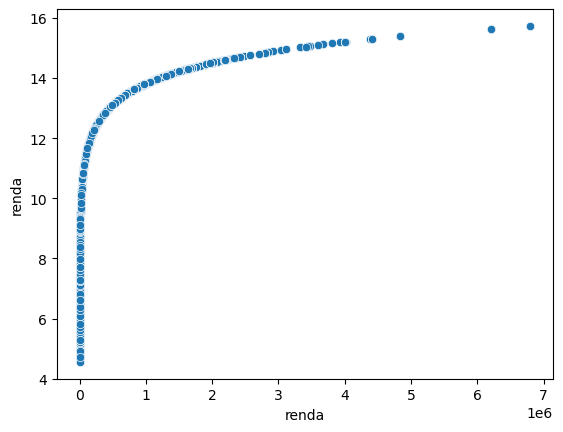

In [4]:
sns.scatterplot(y=np.log(df.renda), x='renda', data=df)

In [5]:
res = smf.ols('np.log(renda) ~ renda',data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                 2.300e+05
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:09:39   Log-Likelihood:            -1.1515e+06
No. Observations:              750000   AIC:                         2.303e+06
Df Residuals:                  749998   BIC:                         2.303e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8778      0.001   6614.917      0.000       8.875       8.880
renda       6.882e-06   1.43e-08    479.588      0.000    6.85e-06    6.91e-06
==============================================================================
Omnibus:                   398611.644   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37693801.619
Skew:                          -1.655   Prob(JB):                         0.00
Kurtosis:                      37.572   Cond. No.                     9.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

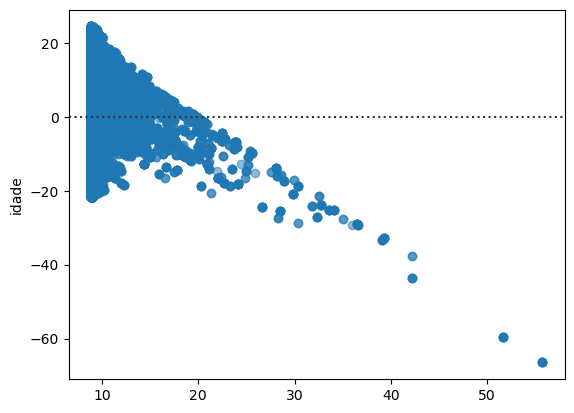

In [6]:
sns.residplot(x=res.predict(), y='idade', data=df, lowess=False, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

In [ ]:
st_res = res.outlier_test()
sns.scatterplot(x = res.predict(), y = st_res.student_resid);

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

<AxesSubplot:xlabel='renda', ylabel='renda'>

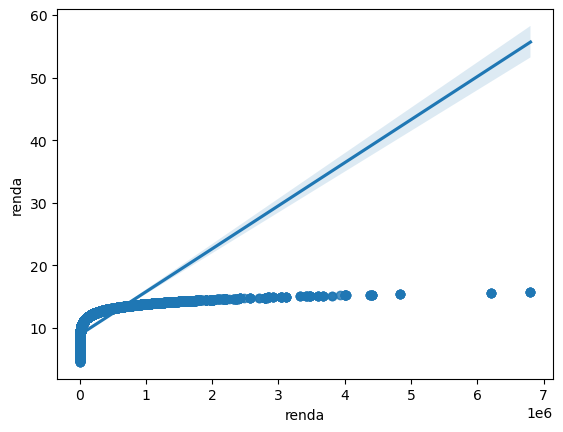

In [13]:
sns.regplot(y= np.log(df.renda), x='renda', data=df)

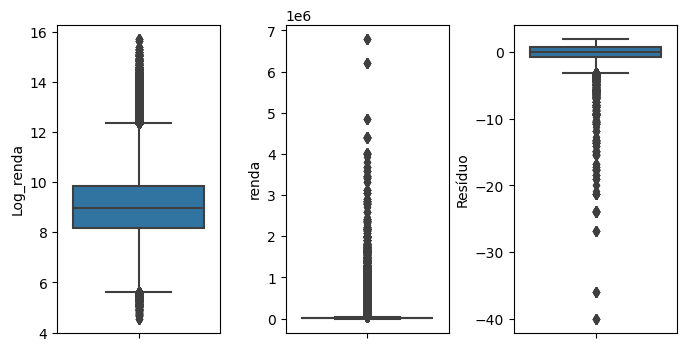

In [11]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = np.log(df.renda), data=df, ax=ax[0])
sns.boxplot(y = 'renda',data=df, ax=ax[1])
sns.boxplot(y = res.resid ,data=df, ax=ax[2]);

ax[0].set_ylabel('Log_renda')
ax[2].set_ylabel('Renda')
ax[2].set_ylabel('Resíduo');

In [ ]:
res = smf.ols('np.log(renda) ~ renda',data=df).fit()

fig = sm.graphics.influence_plot(res, criterion="cooks")
fig.tight_layout(pad=1.0)

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [15]:
df.corr(method='spearman')

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,1.000000,0.028806,-0.046462,-0.030689,0.031365,-0.018925
qtd_filhos,0.028806,1.000000,-0.415151,-0.052479,0.828600,-0.019957
idade,-0.046462,-0.415151,1.000000,0.264237,-0.350006,0.107999
tempo_emprego,-0.030689,-0.052479,0.264237,1.000000,-0.026615,0.564138
qt_pessoas_residencia,0.031365,0.828600,-0.350006,-0.026615,1.000000,-0.008260
renda,-0.018925,-0.019957,0.107999,0.564138,-0.008260,1.000000


In [39]:
import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [40]:
variaveis = ['renda',    'sexo',  'idade'
            , 'qtd_filhos']

dummie = pd.get_dummies(df[variaveis])
dummie.head()

,renda,idade,qtd_filhos,sexo_F,sexo_M
0,11138.14,47,0,0,1
1,2424.81,30,0,0,1
2,13749.66,28,0,0,1
3,2361.84,44,2,0,1
4,790.78,33,2,1,0


In [41]:
vif(dummie.values, 3)

15.620888153198335

In [43]:
vars_vif = pd.DataFrame()
vars_vif["VIF"] = [vif(dummie, i) for i in range(dummie.shape[1])]
vars_vif["Features"] = dummie.columns

vars_vif.round(2)

,VIF,Features
0,1.01,renda
1,1.21,idade
2,1.16,qtd_filhos
3,15.62,sexo_F
4,7.04,sexo_M


In [44]:
r1 = smf.ols('''
    renda ~ 
        sexo + idade + qtd_filhos
    ''', data=df.dropna()).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7582.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:48:42   Log-Likelihood:            -8.0534e+06
No. Observations:              624240   AIC:                         1.611e+07
Df Residuals:                  624236   BIC:                         1.611e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.048e+04    620.775    -65.215      0.000   -4.17e+04   -3.93e+04
sexo[T.M]  -1.284e+04    257.715    -49.836      0.000   -1.33e+04   -1.23e+04
idade       1767.6004     13.795    128.130      0.000    1740.562    1794.639
qtd_filhos  -131.5812    164.915     -0.798      0.425    -454.810     191.647
==============================================================================
Omnibus:                  1409325.182   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      17779575652.629
Skew:                          21.301   Prob(JB):                         0.00
Kurtosis:                     828.683   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""